# Covid-19 disease situation from 29-1-2020 -> 29-8-2020

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

df = pd.read_csv('drive/My Drive/coronavirusdatasets/covid_19_data.csv')
df.shape

(98252, 8)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98252 entries, 0 to 98251
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              98252 non-null  int64  
 1   ObservationDate  98252 non-null  object 
 2   Province/State   67099 non-null  object 
 3   Country/Region   98252 non-null  object 
 4   Last Update      98252 non-null  object 
 5   Confirmed        98252 non-null  float64
 6   Deaths           98252 non-null  float64
 7   Recovered        98252 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.0+ MB


In [41]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [47]:
df['ObservationDate'] = df['ObservationDate'].astype('datetime64')
df['Confirmed'] = df['Confirmed'].astype('int64')
df['Deaths'] = df['Deaths'].astype('int64')
df['Recovered'] = df['Recovered'].astype('int64')
df = df.rename(columns = {'ObservationDate':'Date'})

In [76]:
df_date = pd.DataFrame(df.groupby('Date').sum())
if 'SNo' in df_date.columns:
    df_date = df_date.drop('SNo',axis=1)
df_date['Date'] = df_date.index
df_date.Date = df_date.Date.apply(lambda x:x.date())
print(df_date)

['Confirmed', 'Deaths', 'Recovered', 'Date']


In [54]:
melted_data = pd.melt(df_date, id_vars = ['Date'])
print(melted_data)

           Date   variable     value
0    2020-01-22  Confirmed       555
1    2020-01-23  Confirmed       653
2    2020-01-24  Confirmed       941
3    2020-01-25  Confirmed      1438
4    2020-01-26  Confirmed      2118
..          ...        ...       ...
658  2020-08-25  Recovered  15570191
659  2020-08-26  Recovered  15794441
660  2020-08-27  Recovered  15997281
661  2020-08-28  Recovered  16198165
662  2020-08-29  Recovered  16409757

[663 rows x 3 columns]


In [95]:
def bar_plot(column_name):
  plt.figure(figsize=(50,20))
  plt.xticks(rotation = 90)
  plt.xlabel('Date', fontsize = 30, color = 'red', fontweight = 'bold')
  plt.ylabel('Recovered', fontsize = 30, color = 'red', fontweight = 'bold')
  sns.barplot(x = 'Date', y=column_name, data = df_date, ci=None)

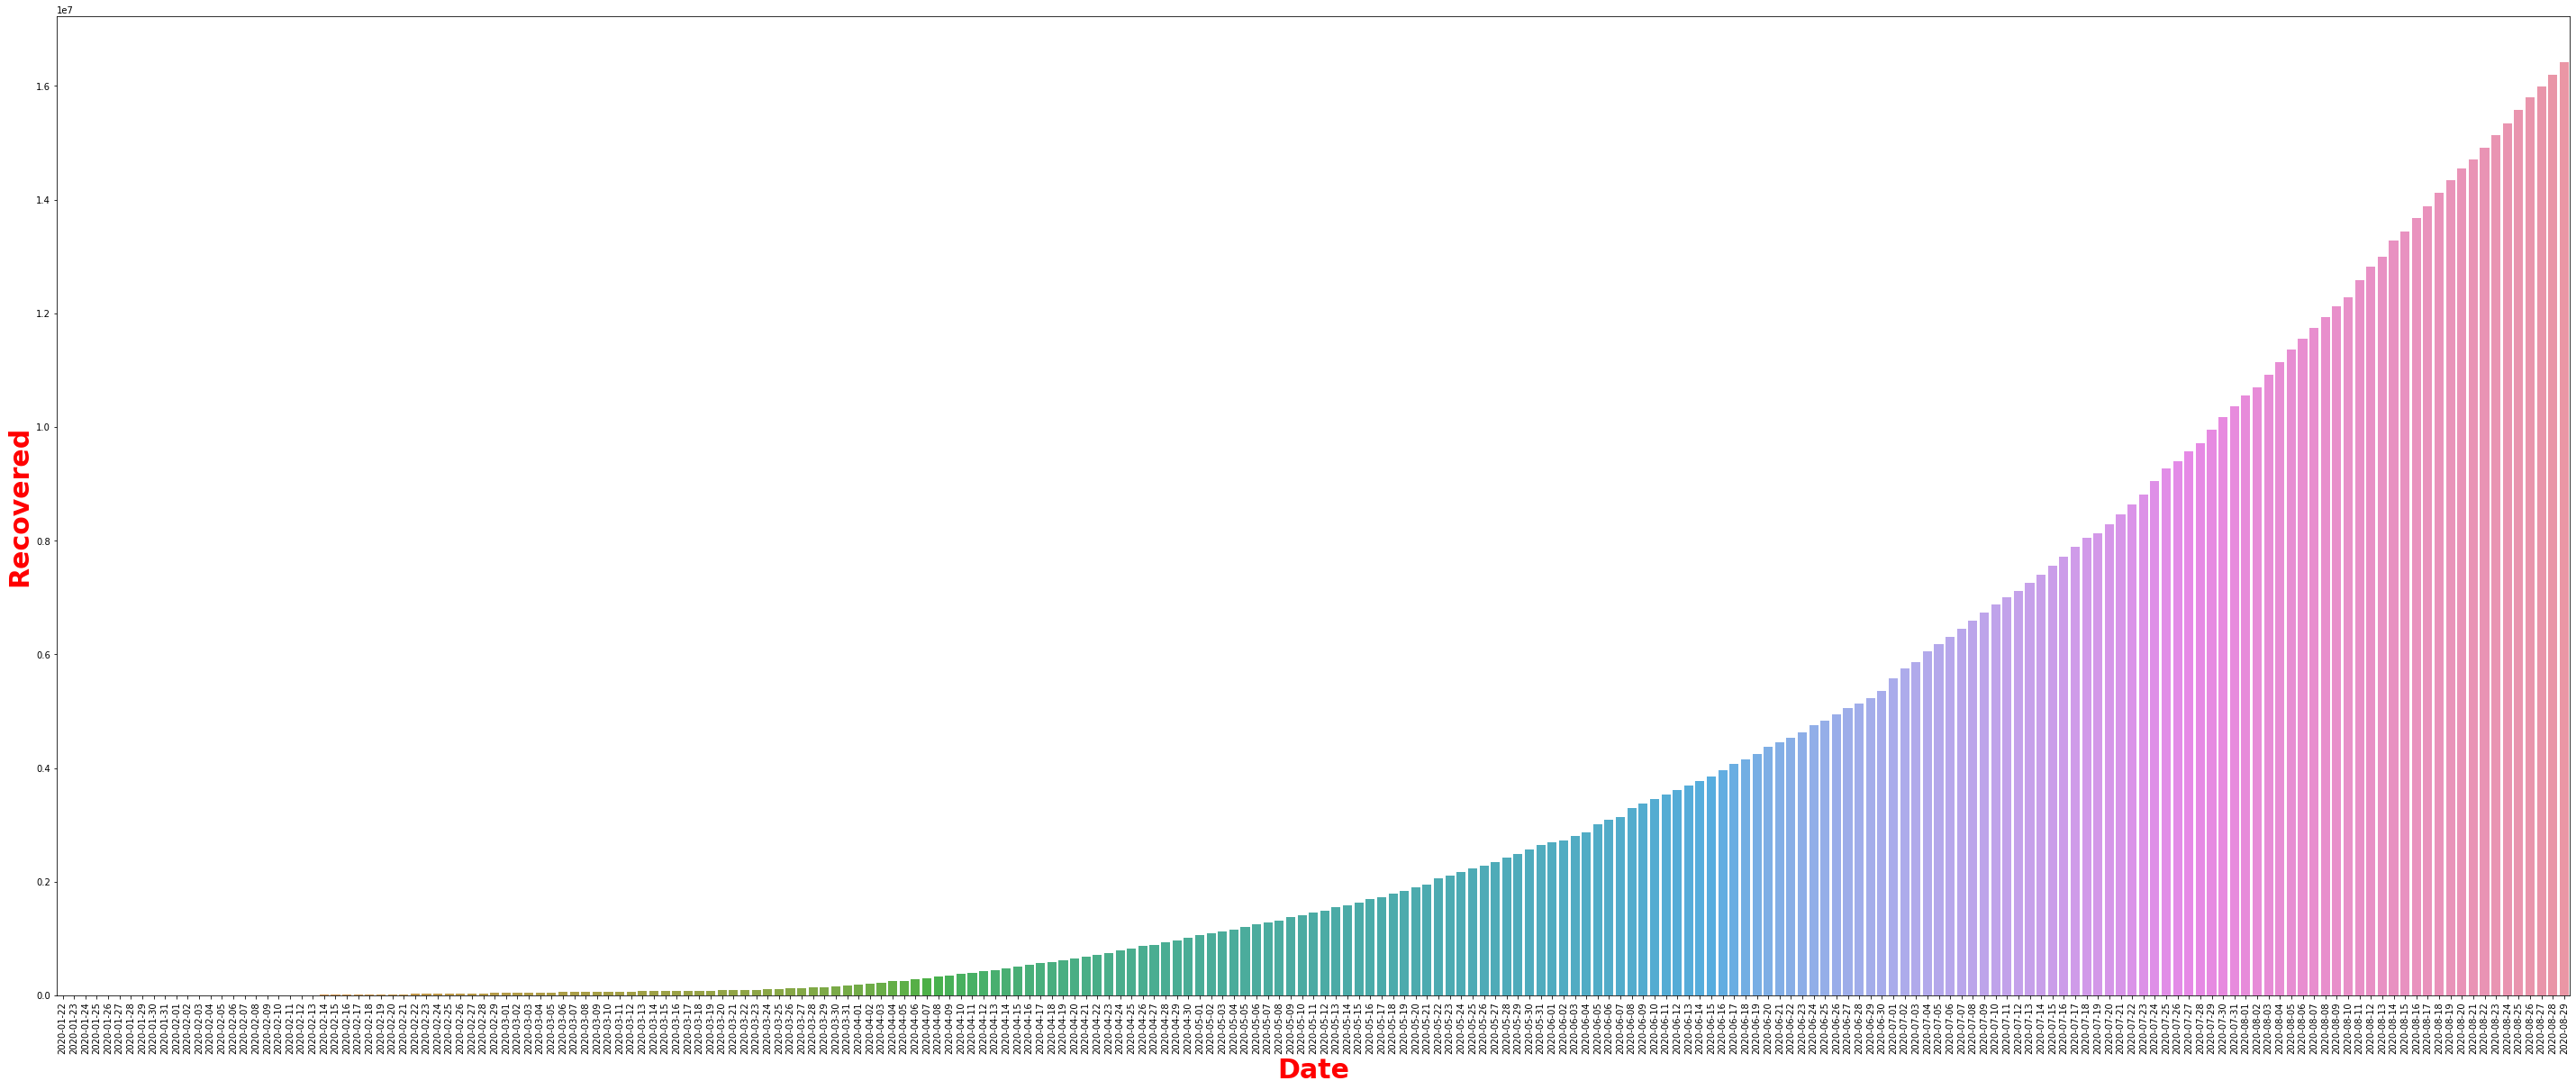

In [96]:
bar_plot('Recovered')

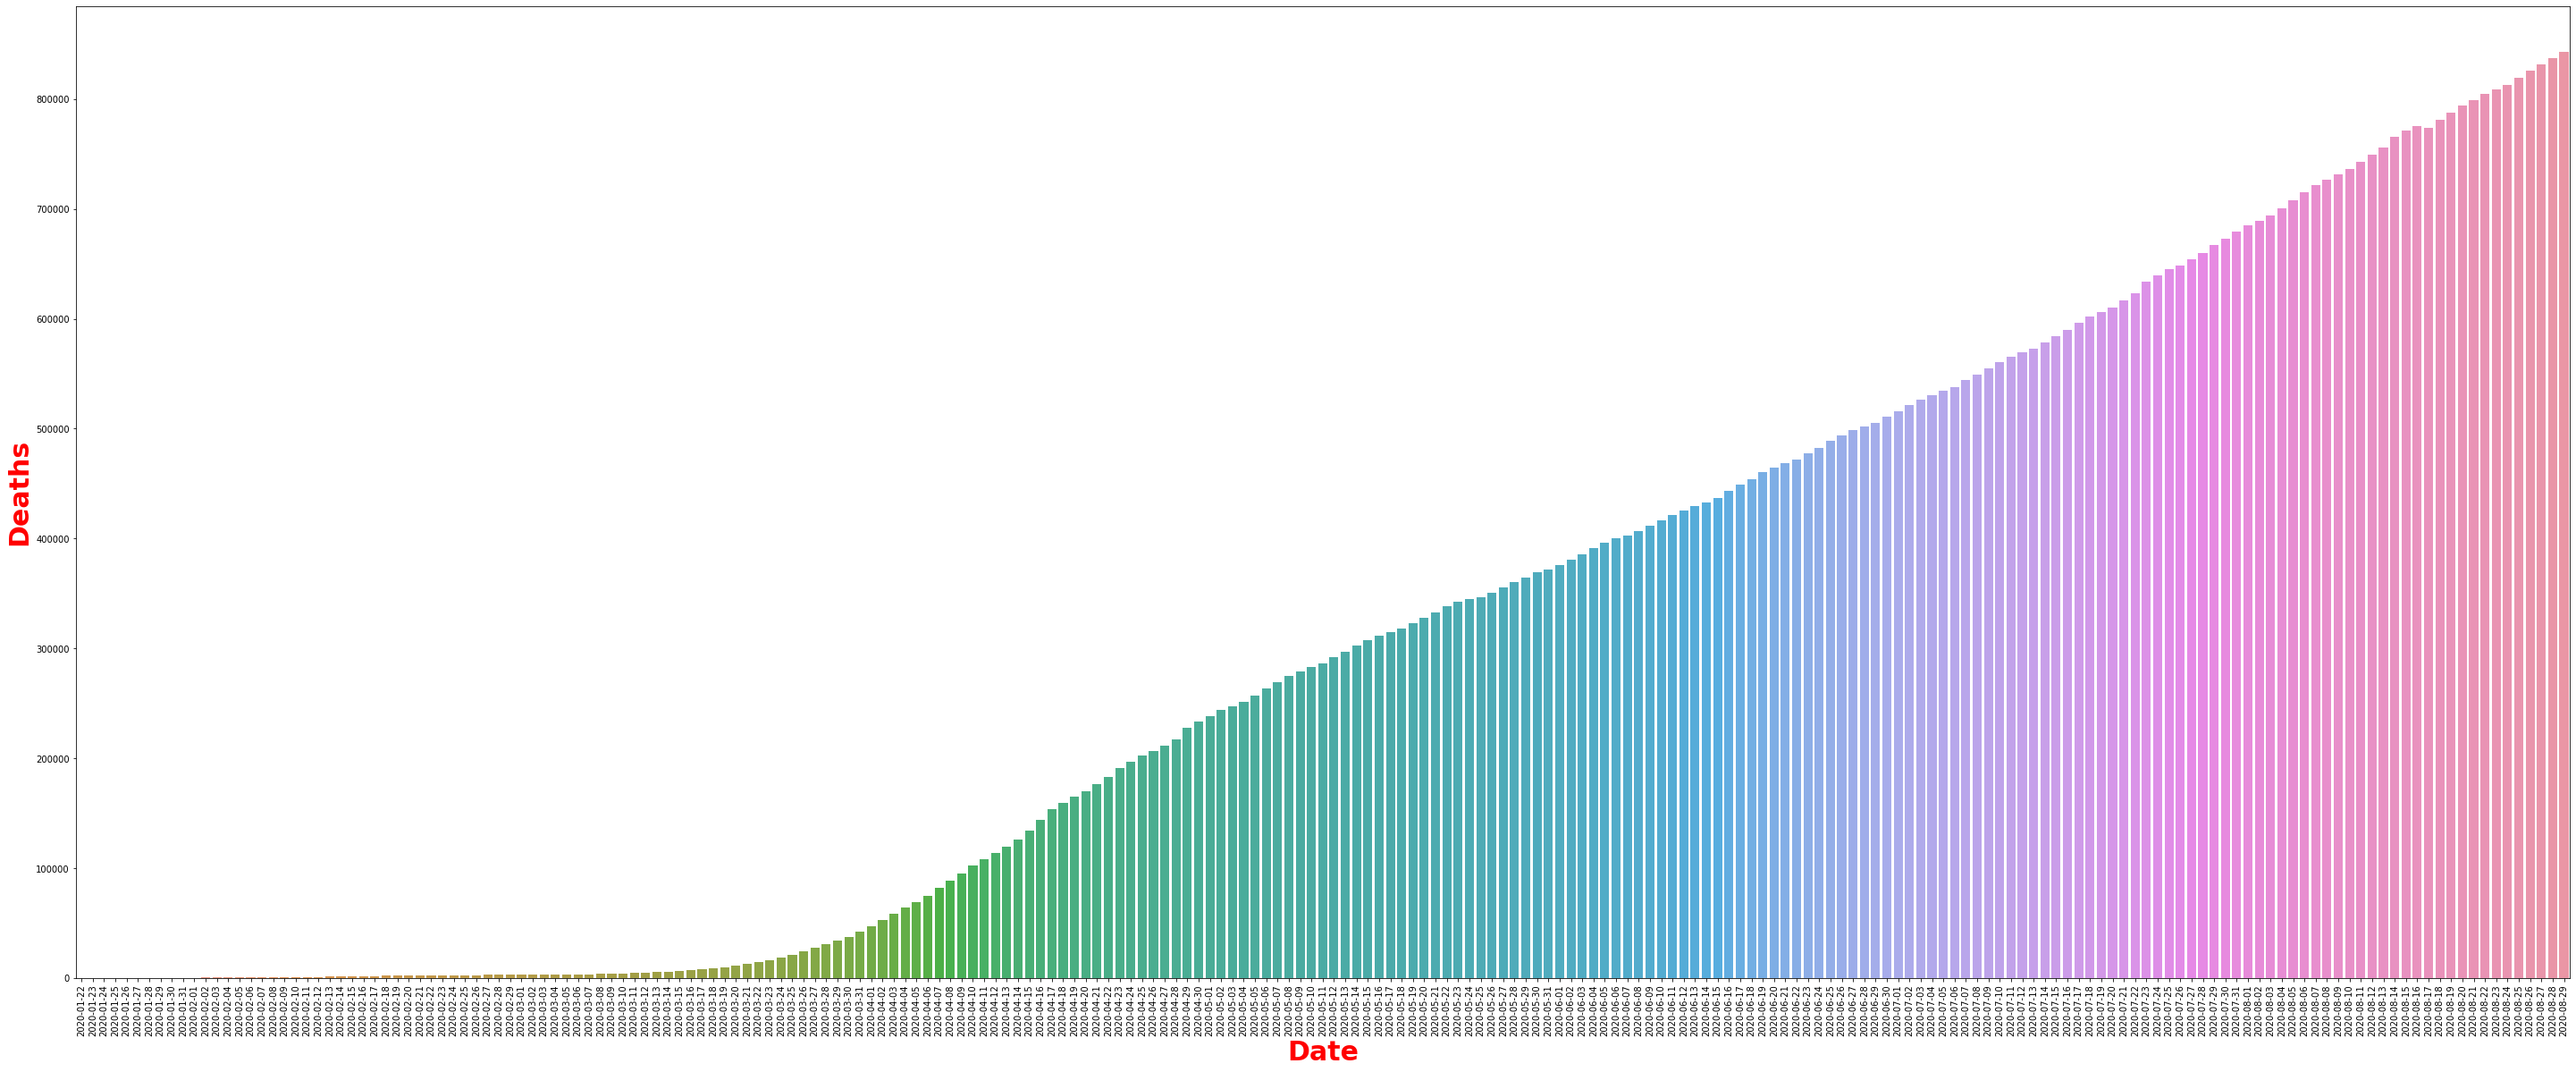

In [97]:
bar_plot('Deaths')

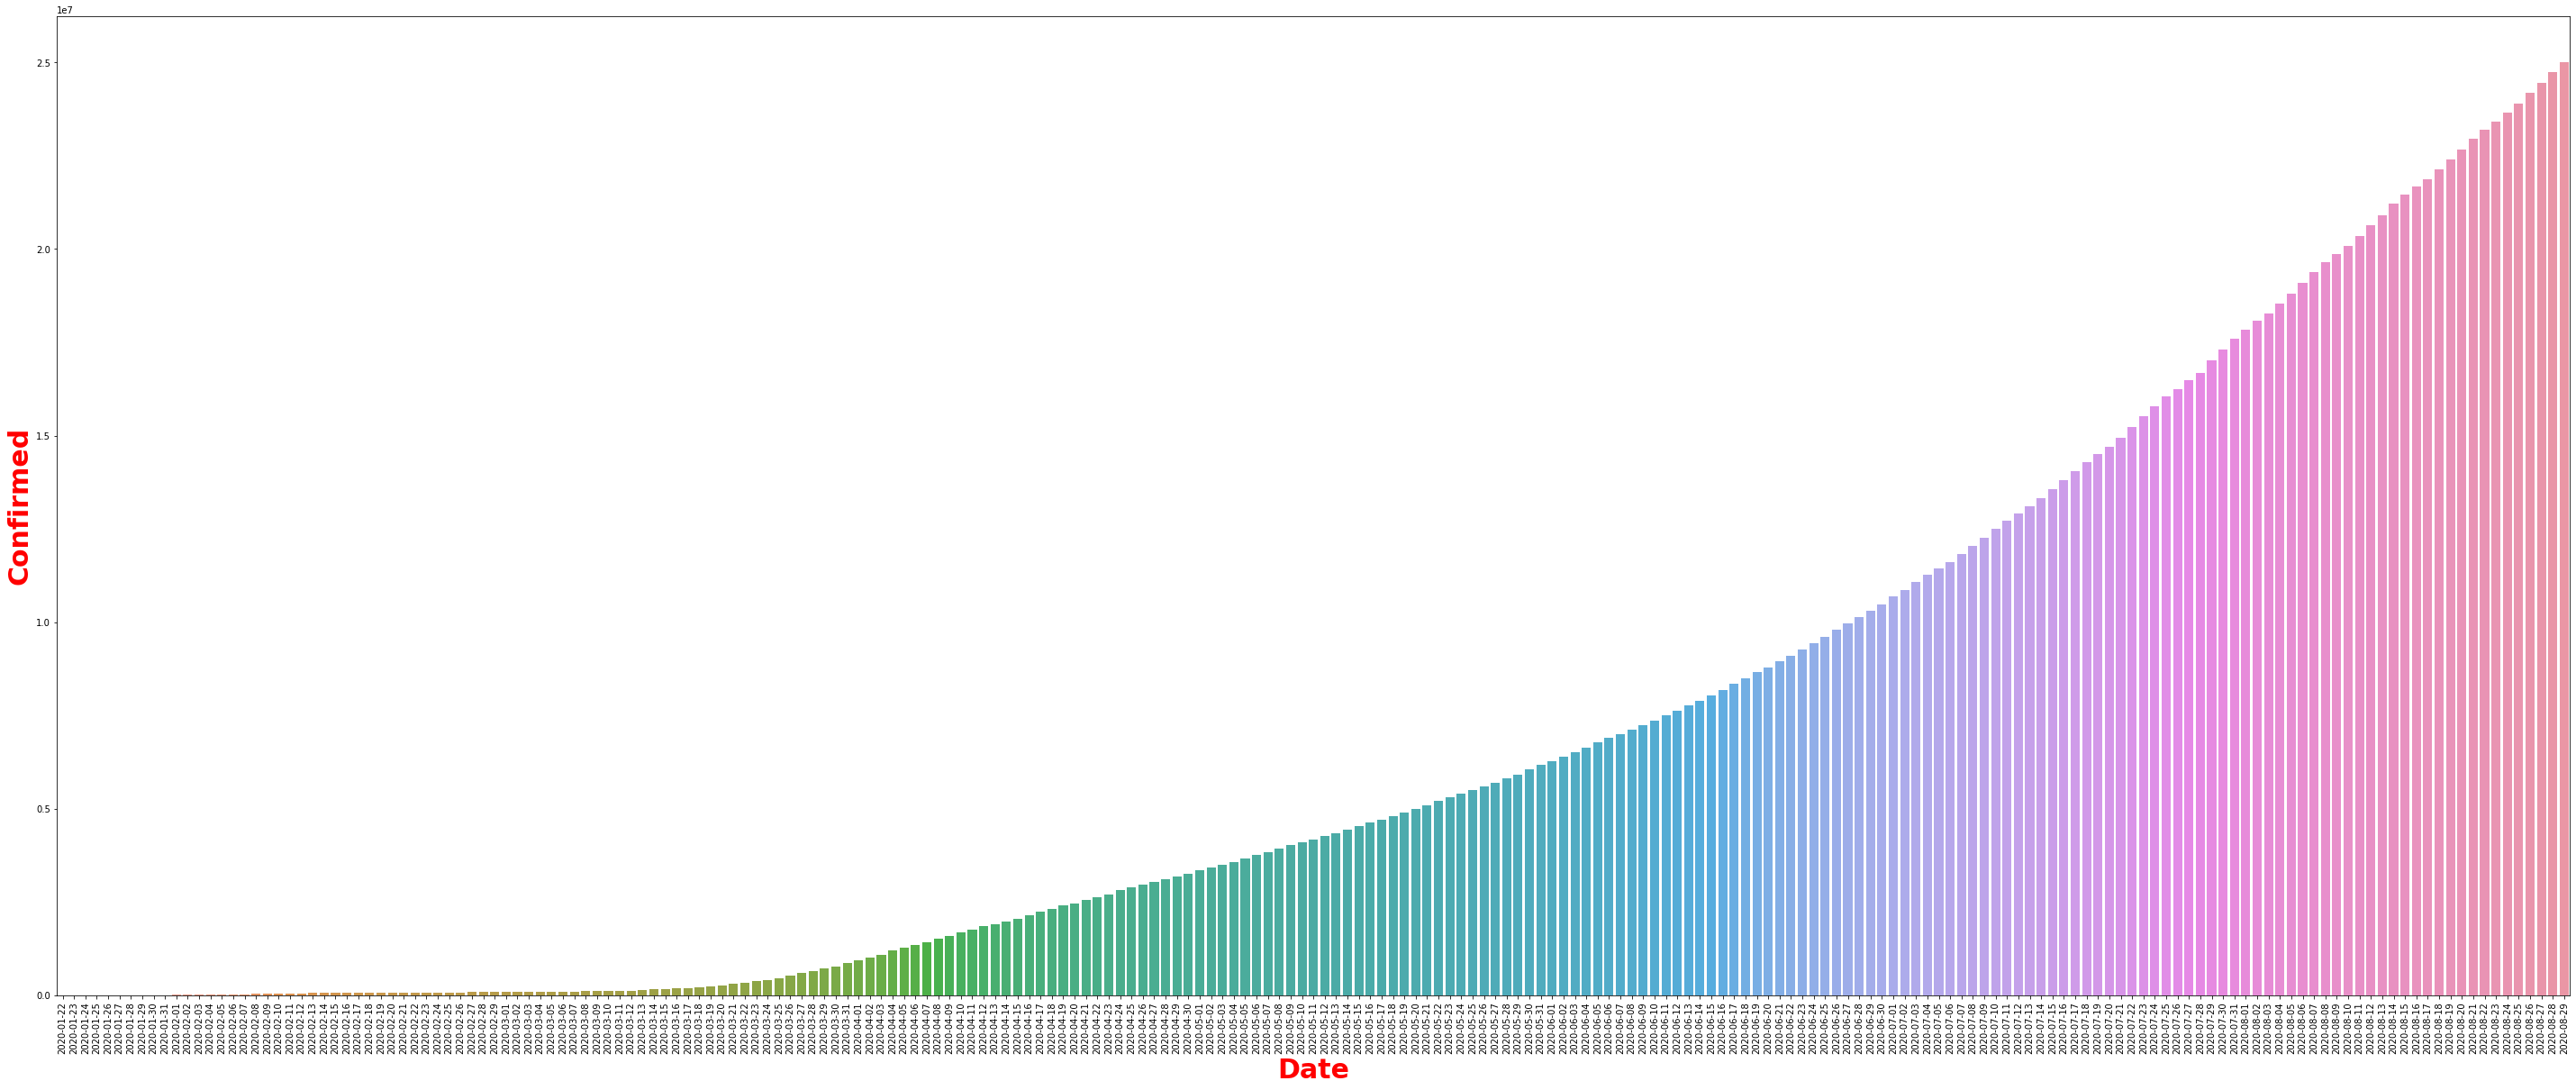

In [98]:
bar_plot('Confirmed')

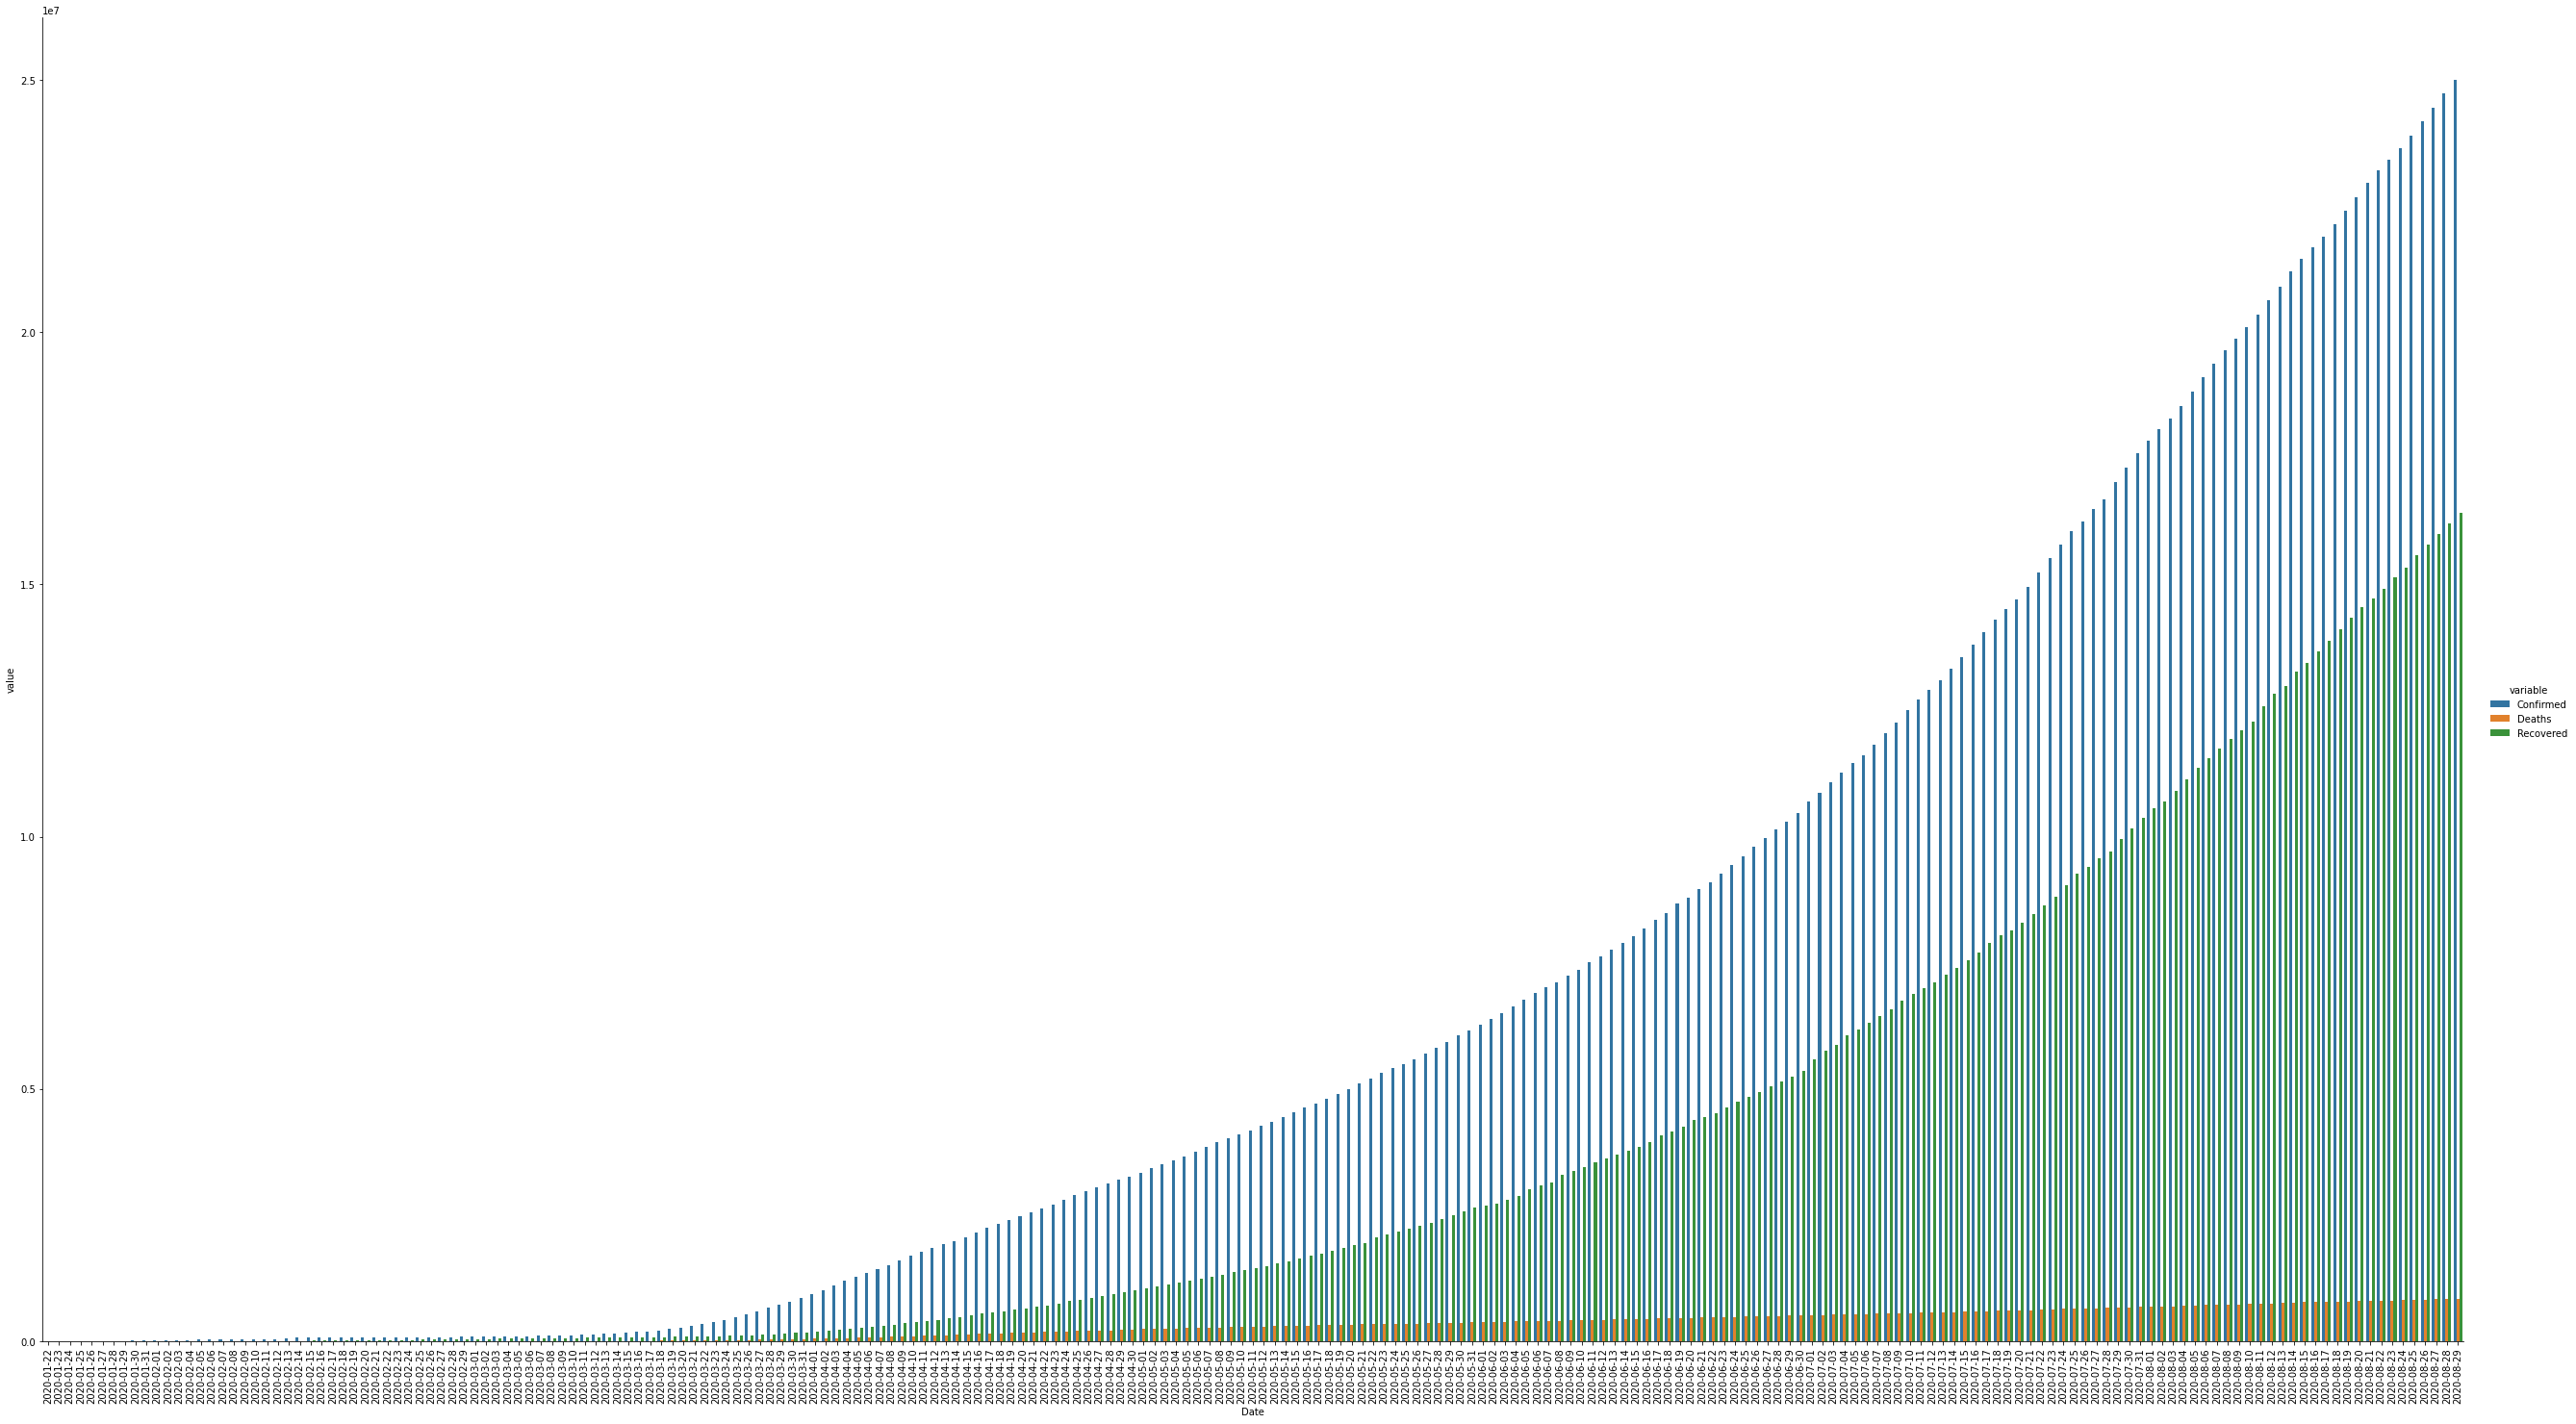

In [99]:
combined_data = sns.catplot(x = 'Date', y='value', hue='variable', data = melted_data,
                          kind = 'bar', height = 20, aspect = 1.8, legend = True)
combined_data.set_xticklabels(rotation = 90)

In [100]:
df_date.head()

,Confirmed,Deaths,Recovered,Date
Date,,,,
2020-01-22,555,17,28,2020-01-22
2020-01-23,653,18,30,2020-01-23
2020-01-24,941,26,36,2020-01-24
2020-01-25,1438,42,39,2020-01-25
2020-01-26,2118,56,52,2020-01-26


In [105]:
import plotly.express as px
fig = px.line(melted_data, x = 'Date', y = 'value', color = 'variable')
fig.show()

In [108]:
# Latest day on dataset - 29/8/2020
latest_data = df[(df.Date == max(df['Date']))]
print(latest_data)

         SNo       Date     Province/State  ... Confirmed Deaths  Recovered
97510  97511 2020-08-29                NaN  ...     38143   1402      29063
97511  97512 2020-08-29                NaN  ...      9279    275       5020
97512  97513 2020-08-29                NaN  ...     43781   1491      30717
97513  97514 2020-08-29                NaN  ...      1124     53        902
97514  97515 2020-08-29                NaN  ...      2551    107       1041
...      ...        ...                ...  ...       ...    ...        ...
98247  98248 2020-08-29  Zaporizhia Oblast  ...      1520     25        883
98248  98249 2020-08-29            Zeeland  ...      1048     72          0
98249  98250 2020-08-29           Zhejiang  ...      1277      1       1268
98250  98251 2020-08-29    Zhytomyr Oblast  ...      3155     61       1837
98251  98252 2020-08-29       Zuid-Holland  ...     18774   1344          0

[742 rows x 8 columns]


In [109]:
data_each_country = pd.DataFrame(latest_data.groupby('Country/Region').sum())
if 'SNo' in data_each_country:
    data_each_country = data_each_country.drop('SNo', axis = 1)
data_each_country['country'] = data_each_country.index
print(data_each_country)

                    Confirmed  Deaths  Recovered             country
Country/Region                                                      
Afghanistan             38143    1402      29063         Afghanistan
Albania                  9279     275       5020             Albania
Algeria                 43781    1491      30717             Algeria
Andorra                  1124      53        902             Andorra
Angola                   2551     107       1041              Angola
...                       ...     ...        ...                 ...
West Bank and Gaza      21668     147      14631  West Bank and Gaza
Western Sahara             10       1          8      Western Sahara
Yemen                    1946     563       1113               Yemen
Zambia                  11902     284      11092              Zambia
Zimbabwe                 6406     196       5056            Zimbabwe

[190 rows x 4 columns]


In [110]:
print('Total number of confirmed cases over these day: ',sum(data_each_country['Confirmed']))

Total number of confirmed cases over these day:  24996456


In [112]:
data_each_country.sort_values(['Confirmed','Deaths','Recovered'], ascending = [False, False, False])

,Confirmed,Deaths,Recovered,country
Country/Region,,,,
US,5961094,182761,2140614,US
Brazil,3846153,120262,3202185,Brazil
India,3542733,63498,2713933,India
Russia,982573,16977,802365,Russia
Peru,629961,28471,438017,Peru
...,...,...,...,...
Dominica,20,0,18,Dominica
Saint Kitts and Nevis,17,0,17,Saint Kitts and Nevis
Holy See,12,0,12,Holy See


In [114]:
# Cases in Vietnam
data_vietnam = data_each_country[data_each_country['country'] == 'Vietnam']
print(data_vietnam)

                Confirmed  Deaths  Recovered  country
Country/Region                                       
Vietnam              1040      32        677  Vietnam


In [124]:
graph_df = px.data.gapminder().query('year==2007')
geo_df = pd.merge(data_each_country, graph_df, how='left', on = 'country')

fig = px.scatter(graph_df, x="gdpPercap", y="lifeExp", size="pop", color="continent",
           hover_name="country", log_x=True, size_max=60)
fig.show()

In [122]:
geo_df.loc[geo_df.continent.isnull()]

,Confirmed,Deaths,Recovered,country,continent,iso_alpha,iso_num


In [125]:
geo_df = geo_df.dropna(how = 'any')
geo_df = geo_df.drop(['year','lifeExp','pop','gdpPercap'], axis = 1)


In [126]:
fig = px.scatter_geo(geo_df, locations='iso_alpha',
                   size = 'Confirmed', color =' continent', hover_name = 'country',
                   projection='natural earth')
fig.show()

In [127]:
import datetime as dt

df_countrybydate = df.groupby(['Country/Region', 'Last Update', 'Date']).sum().reset_index().sort_values('Last Update', ascending=False)
df_countrybydate = df_countrybydate.groupby(['Country/Region', 'Date']).max().reset_index().sort_values('Last Update')
df_countrybydate["Size"] = np.where(df_countrybydate['Country/Region'] == 'Mainland China', df_countrybydate['Confirmed'], df_countrybydate['Confirmed']*200)
# df_countrybydate['UpDate'] = df_countrybydate['Date'].apply(lambda x: dt.datetime(x.year,x.month,x.day))
# df_countrybydate['Date'] = pd.to_datetime(df_countrybydate['Date']).apply(lambda x: x.date())
# df_countrybydate['Date']= pd.to_datetime(df_countrybydate['Date']) 
df_countrybydate['Date'] = pd.to_datetime(df_countrybydate['Date'], dayfirst=True).dt.strftime('%Y-%m-%d')

In [129]:
fig = px.scatter_geo(df_countrybydate,locations='Country/Region',
                   locationmode = 'country names',
                   hover_name = 'Country/Region', size = 'Size', color = 'Confirmed',
                   animation_frame = 'Date', projection = 'natural earth',
                   template = 'none',
                   title = 'Progression of covid19 in Confirmed Cases from Januaray to August 2020')
fig.show()

In [133]:
mortality_rate = []
for i in df_date.Date:
    death_sum=df_date['Deaths'][i].sum()
    confirmed_sum=df_date['Confirmed'][i].sum()
    mortality_rate.append(death_sum/confirmed_sum)

In [134]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

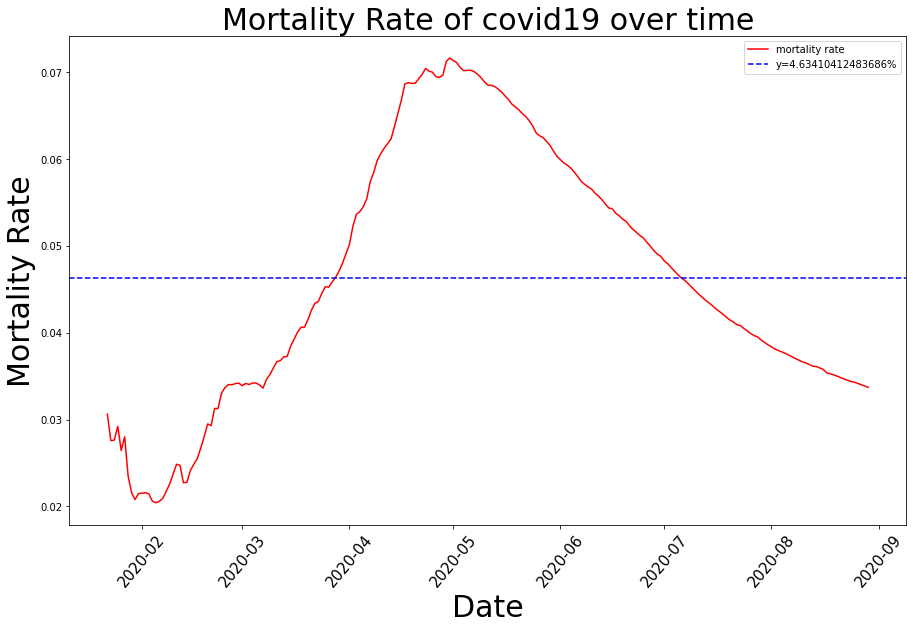

In [135]:
mean_mortality_rate=np.mean(mortality_rate)
plt.figure(figsize=(15,9))
plt.plot(df_date.Date, mortality_rate, color='red')
plt.axhline(y=mean_mortality_rate, linestyle='--',color='blue')
plt.title('Mortality Rate of covid19 over time',size=30)
plt.legend(['mortality rate', 'y=' + str(mean_mortality_rate*100) + '%'])
plt.xlabel('Date',size=30)
plt.ylabel('Mortality Rate',size=30)
plt.xticks(rotation=50,size=15)
plt.show()

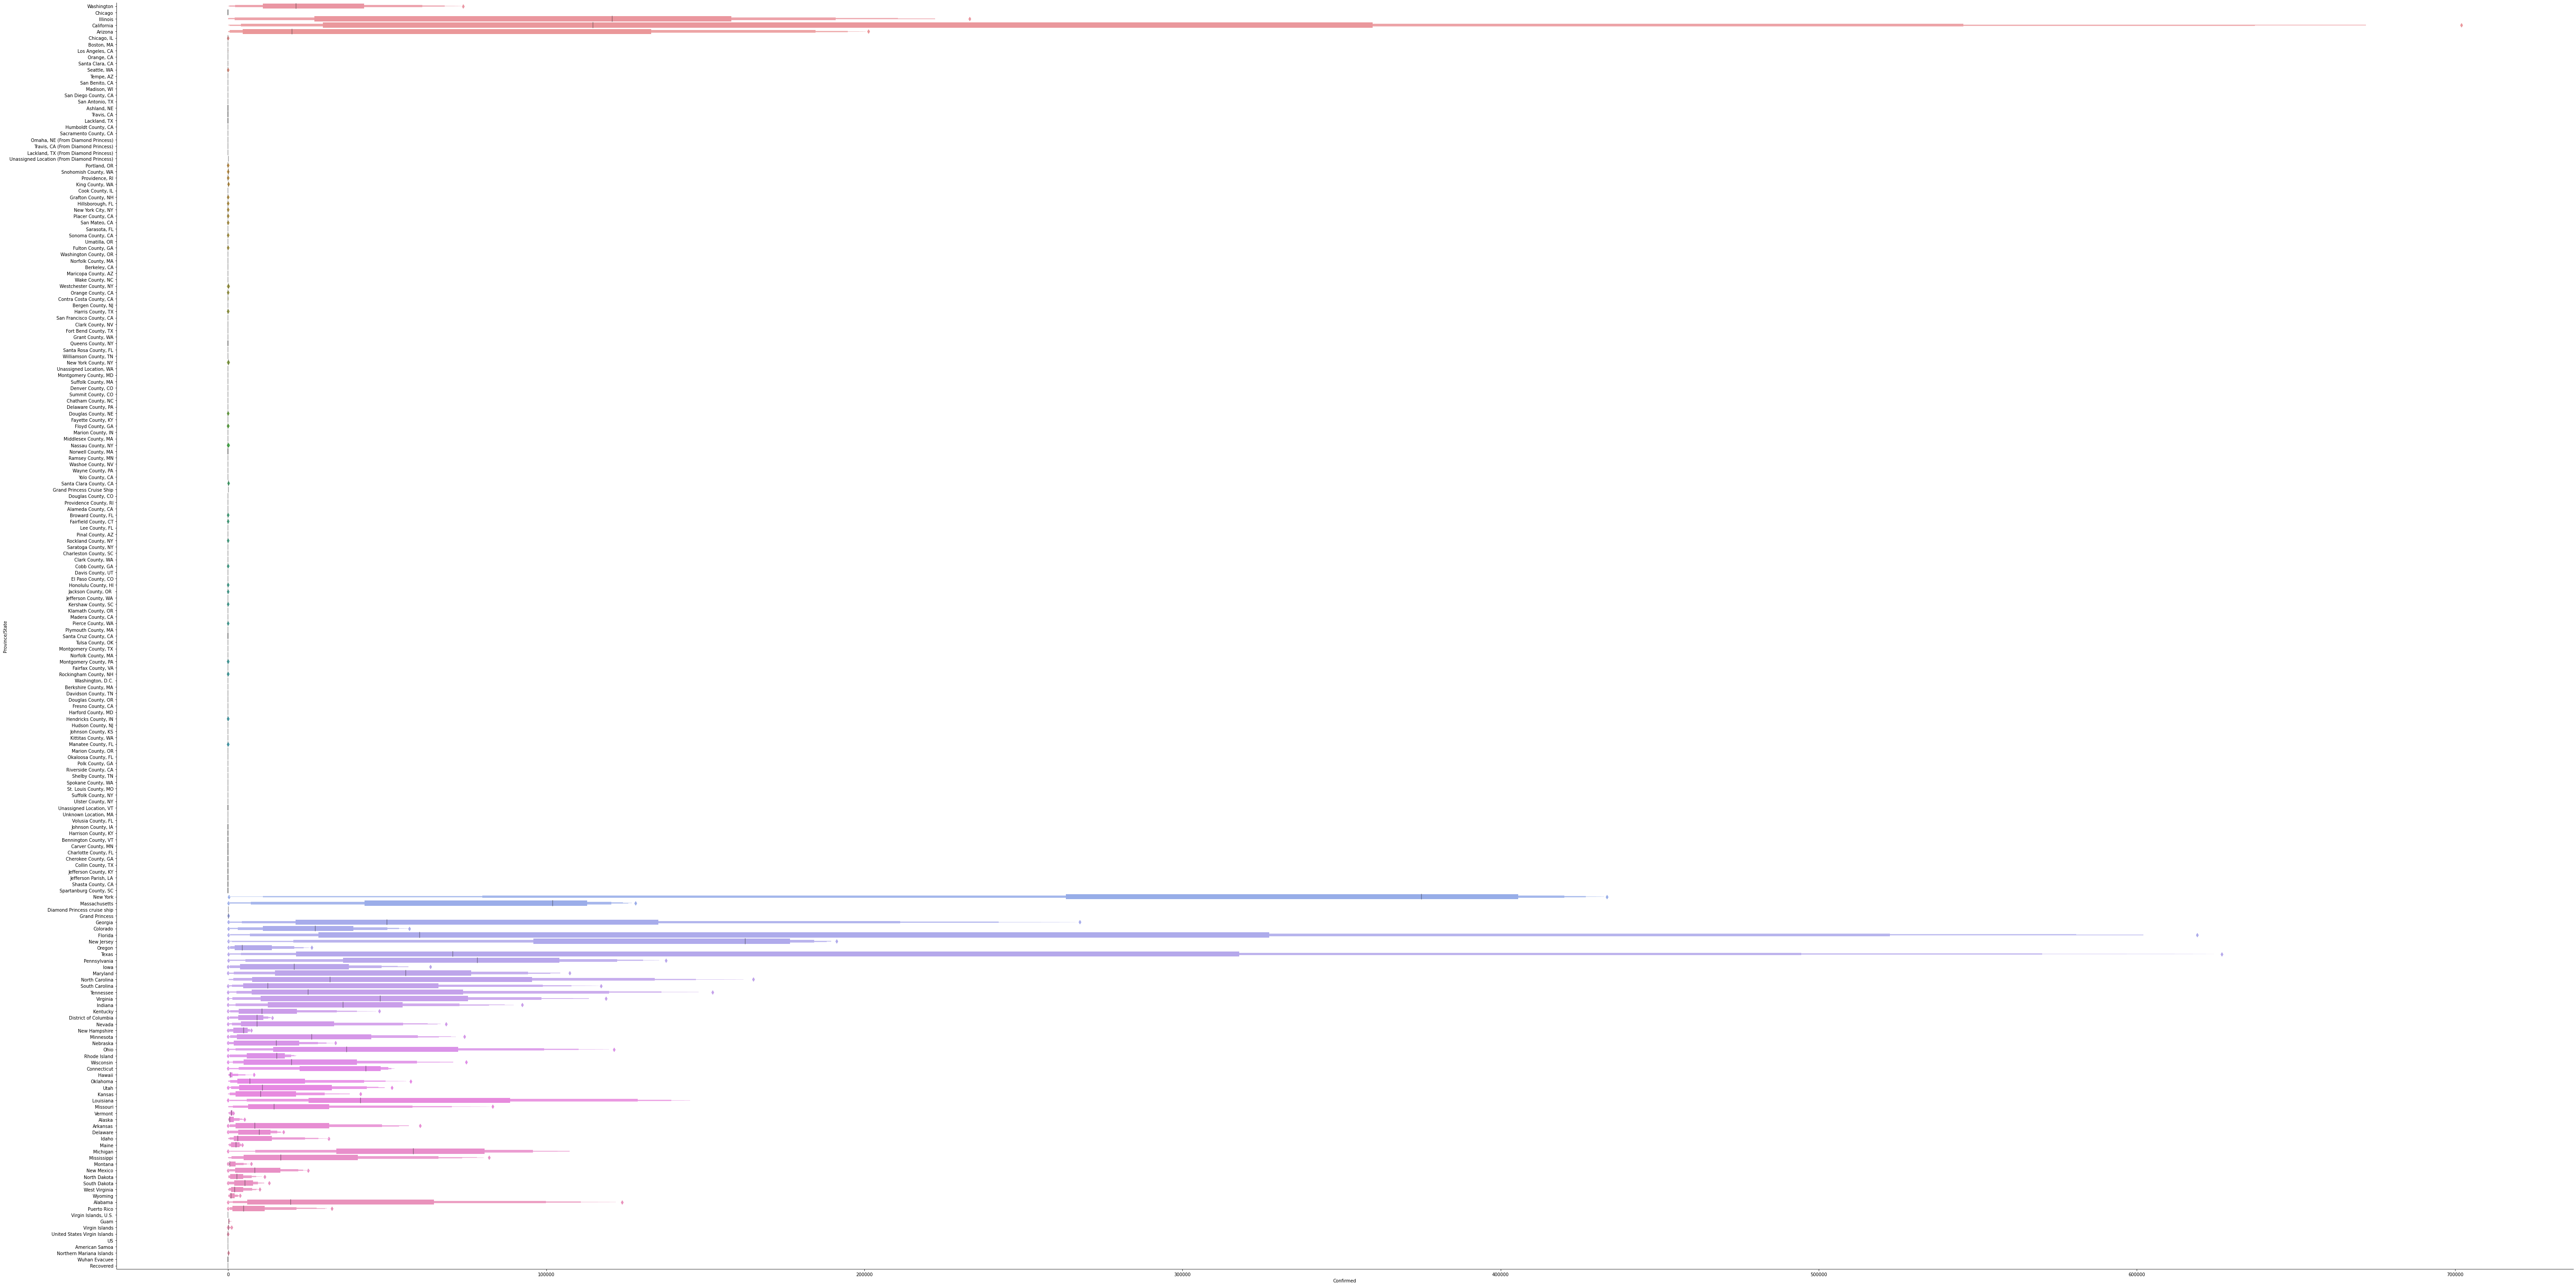

In [144]:
# Confirmed Cases based on USA states

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

usa_data = df[df['Country/Region'] == 'US']
sns.catplot(y = 'Province/State', x = 'Confirmed', data = usa_data,
            kind = 'boxen', height = 40, aspect = 2.0)

In [138]:
# Death/ Recovery rate in Hubei

geo_df['country'].replace({'Hong Kong, China': 'China',}, inplace = True)

In [139]:
df_province = df.groupby(['Province/State','Date']).max().reset_index().sort_values('Date', ascending = False)
df_chinese_provinces = df_province[df_province['Country/Region'] == 'Mainland China']
df_chinese_provinces = df_chinese_provinces.drop_duplicates(subset = ['Province/State']).sort_values('Province/State')
# Macau, Taiwan and Hong Kong have their own countries in the dataset
df_chinese_provinces = df_chinese_provinces[~df_chinese_provinces['Province/State'].isin(['Macau', 'Taiwan', 'Hong Kong'])]
df_chinese_provinces = df_chinese_provinces[df_chinese_provinces["Confirmed"]>0]

df_ChDead = df_chinese_provinces.loc[:,["Province/State", "Recovered", "Deaths"]]
df_Hubei_Dead = df_ChDead[df_ChDead["Province/State"] == "Hubei"]

# In Cali - USA
df_usa_provinces = df_province[df_province['Country/Region'] == 'US']
df_usa_provinces = df_usa_provinces.drop_duplicates(subset = ['Province/State']).sort_values('Province/State')
df_ChDead = df_usa_provinces.loc[:, ["Province/State", "Recovered", "Deaths", 'Confirmed']]
df_California_Dead = df_ChDead[df_ChDead["Province/State"] == "California"]

In [140]:
print(df_California_Dead)

     Province/State  Recovered  Deaths  Confirmed
8447     California          0   12894     702038


In [141]:
# Death/ Recovered rate in Cali on 29/8
import plotly.graph_objs as go

colors = ['green', 'red']
columns = list(df_California_Dead.iloc[:, 1:3])
values = df_California_Dead.iloc[:, 1:3].values.tolist()[0]

fig = go.Figure(data=[go.Pie(labels=columns, 
                             values=values , hole=.3)]
               )

fig.update_traces(hoverinfo='label + percent + value', textinfo='label + percent', textfont_size=18,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2))
                 )

fig.update_layout(
    title_text = "Death/Recovered Rate in California", height=500, width=700, showlegend=False)

fig.show()
